In [1]:
import pandas as pd
import numpy as np
import datetime
from wordcloud import WordCloud
import seaborn as sb
import requests
from bs4 import BeautifulSoup
from urllib.request import urlopen 
from urllib.error import HTTPError
from urllib.error import URLError
from bs4 import BeautifulSoup

In [3]:
import nltk
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
import string
import matplotlib.pyplot as plt
from wordcloud import WordCloud, STOPWORDS 
import seaborn as sb
%matplotlib inline

In [4]:
df=pd.read_csv("stage3.csv",parse_dates=['date'],infer_datetime_format=True)

In [5]:
df['incident_characteristics']=df['incident_characteristics'].str.replace('|'," ")
df['incident_characteristics']=df['incident_characteristics'].str.replace('/'," ")
df['incident_characteristics']=df['incident_characteristics'].str.replace('('," ")
df['incident_characteristics']=df['incident_characteristics'].str.replace(')'," ")
df['incident_characteristics']=df['incident_characteristics'].str.replace('-'," ")
df['incident_characteristics']=df['incident_characteristics'].astype(str)

In [6]:
text=[]
for i in range(len(df)):
    text.append(df['incident_characteristics'][i])

In [7]:
with open("file.txt", "w") as output:
    output.write(str(text))

In [8]:
t=open('file.txt').read()

In [9]:
wordcloud = WordCloud().generate(t)

(-0.5, 399.5, 199.5, -0.5)

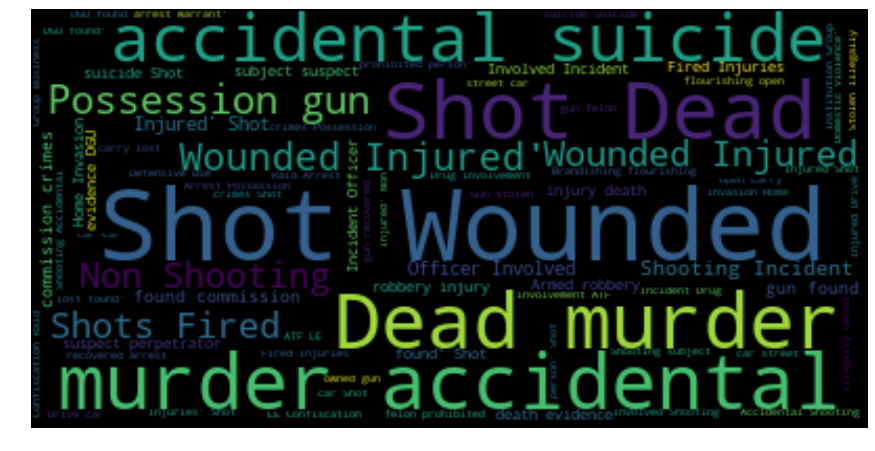

In [10]:
sb.set(rc={'figure.figsize':(15,10)})
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")

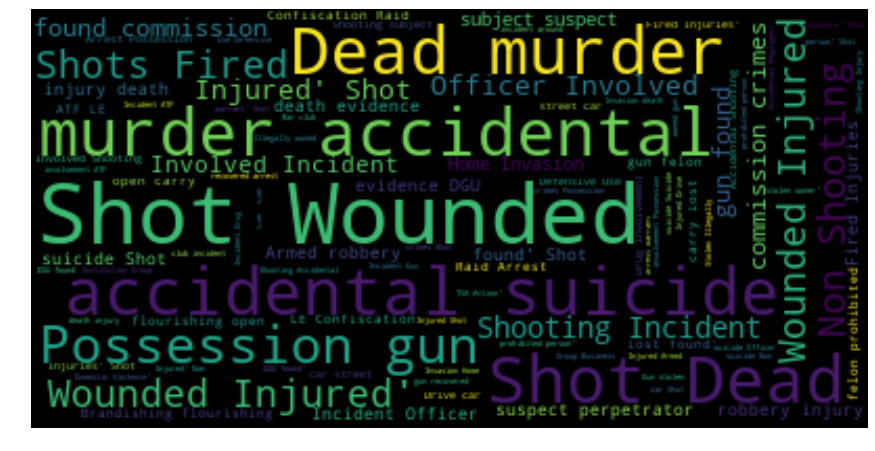

In [11]:
wordcloud = WordCloud(max_font_size=40).generate(t)
plt.figure()
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.show()

In [13]:
def word_process(text):
    tok=word_tokenize(text)
    return [word for word in tok if not word in stopwords.words('english')]

In [14]:
df['Tokens']=df['incident_characteristics'].apply(word_process)

In [16]:
state=df.groupby(['state'])['n_killed','n_injured'].agg('count').reset_index()
state=state.sort_values('n_killed',ascending=False)

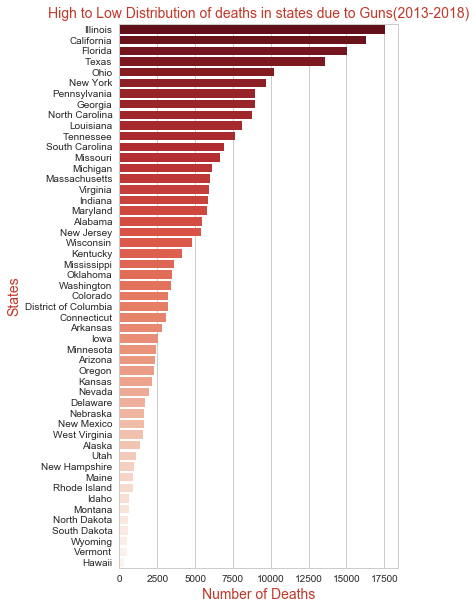

The state with the maximum number of deaths is Illinois with around 17556
On an average every state has almost 4699 deaths


In [17]:
sb.set(rc={'figure.figsize':(5,10)})
sb.set_style("whitegrid")
sb.barplot(x=state['n_killed'],y=state['state'],palette="Reds_r")
plt.xlabel("Number of Deaths",fontsize=14,color='#C0392B')
plt.ylabel("States",fontsize=14,color='#C0392B')
plt.title("High to Low Distribution of deaths in states due to Guns(2013-2018)",fontsize=14,color='#C0392B')
plt.show()
print("The state with the maximum number of deaths is Illinois with around",state['n_killed'].max())
print("On an average every state has almost",int(state['n_killed'].mean()),"deaths")

In [37]:
df['incident_characteristics']=df['incident_characteristics'].str.lower()

In [72]:
df['mass-shooting']=df['incident_characteristics'].apply(lambda x: any(pd.Series(x).str.contains('mass shooting')))
df['suicide']=df['incident_characteristics'].apply(lambda x: any(pd.Series(x).str.contains('suicide')))
df['drug']=df['incident_characteristics'].apply(lambda x: any(pd.Series(x).str.contains('drug')))
df['domestic violence']=df['incident_characteristics'].apply(lambda x: any(pd.Series(x).str.contains('domestic violence')))
df['felon']=df['incident_characteristics'].apply(lambda x: any(pd.Series(x).str.contains('felon')))

In [89]:
df['incident_characteristics'][239647]

'shots fired   no injuries  domestic violence'

In [94]:
df=df.drop(['incident_id','incident_url','source_url','incident_url_fields_missing','sources',
 'state_house_district',
 'state_senate_district'],axis=1)

In [96]:
#Incidents because of mass-shooting
mass=df[['date','state','city_or_county','n_killed','n_injured','mass-shooting']]

Text(0.5,1,'Mass Shootings in every state')

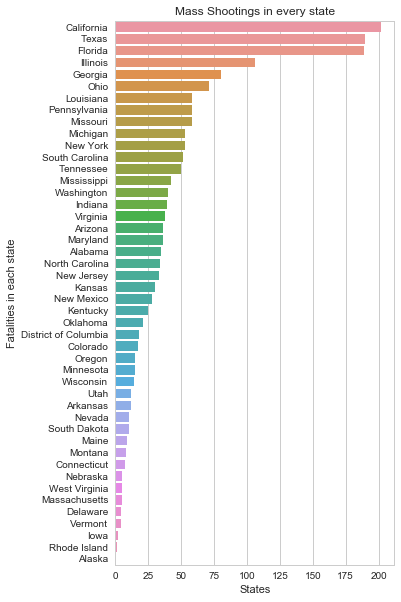

In [169]:
mass=mass[mass['mass-shooting']==True]
x=mass.groupby(['state'])[['n_killed']].sum().reset_index()
x2=mass.groupby(['state','city_or_county'])[['n_killed']].sum().reset_index()
x_mass=x.sort_values(['n_killed'],ascending=False)
x2_mass=x2.sort_values(['n_killed'],ascending=False)
sb.set(rc={'figure.figsize':((5,10))})
sb.set_style("whitegrid")
sb.barplot(x_mass['n_killed'],x_mass['state'])
plt.xlabel("States")
plt.ylabel("Fatalities in each state")
plt.title("Mass Shootings in every state")

In [150]:
mass_shooting_deaths=sum(x2['n_killed'])
deaths=sum(df['n_killed'])
print("Total number of deaths caused by mass-shooting incidents =",sum(x['n_killed']))
print("Total number of deaths caused by gun related incidents =",sum(df['n_killed']))
print("Percentage of deaths caused by mass-shootings",(mass_shooting_deaths/deaths)*100,"%")

Total number of deaths caused by mass-shooting incidents = 1829
Total number of deaths caused by gun related incidents = 60468
Percentage of deaths caused by mass-shootings 3.02474035854 %


In [152]:
states=pd.read_csv("states.csv")

In [163]:
new_df1=pd.merge(x,states, how='left',left_on=['state'],right_on=['State']).dropna()
new_df1=new_df1.drop(['Rank','State'],axis=1)
new_df1=new_df1.sort_values(['n_killed'],ascending=False)

In [164]:
new_df1['PerDeaths']=(new_df1['n_killed']/new_df1['Population'])*100

In [182]:
#States with the most number of mass-shootings/killing incidents
new_df2=mass.groupby(['state'])["n_killed"].count().reset_index().sort_values(['n_killed'],ascending=False)

In [183]:
new_df2['percentincidents']=(new_df2['n_killed']/len(mass))*100

In [184]:
new_df2

,state,n_killed,percentincidents
4,California,194,11.850947
11,Illinois,151,9.224191
9,Florida,116,7.086133
39,Texas,97,5.925473
29,New York,78,4.764814
10,Georgia,69,4.215027
34,Pennsylvania,65,3.970678
16,Louisiana,63,3.848503
38,Tennessee,62,3.787416
31,Ohio,62,3.787416


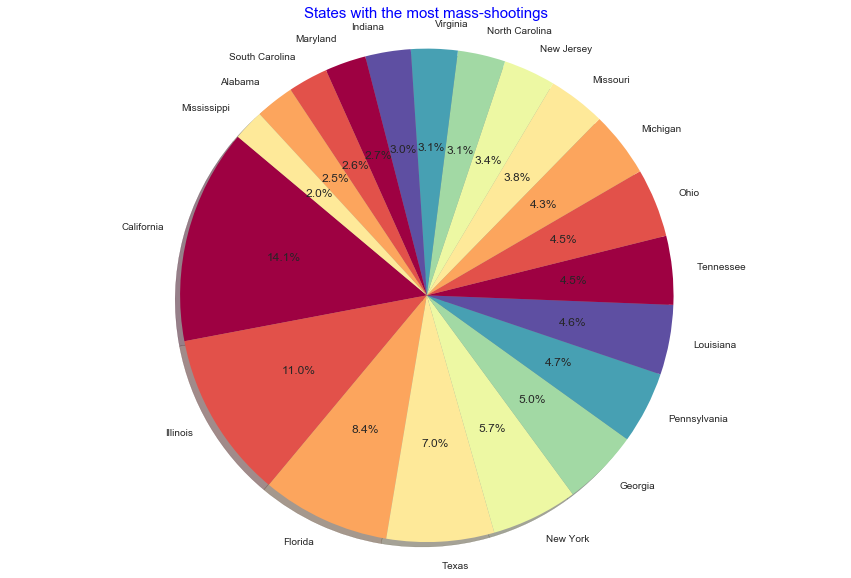

In [196]:
sb.set(rc={'figure.figsize':((15,10))})
cmap = plt.get_cmap('Spectral')
colors = [cmap(i) for i in np.linspace(0, 1, 8)]
plt.pie(new_df2['n_killed'][0:20], labels=new_df2['state'][0:20],
        autopct='%1.1f%%', shadow=True, startangle=140,colors=colors)
plt.axis('equal')
plt.title("States with the most mass-shootings",fontsize=15,color="Blue")
plt.show()

In [200]:
#A deeper look at these incidents-people who mostly get affected, the reason behind it and if there is
#a way to overcome it

subset1=df[df['mass-shooting']==True]

In [204]:
subset1.head()
null_values1 =pd.DataFrame(subset1.isnull().sum()).reset_index()
null_values1.rename(columns={'index': 'RowNames', 0: 'Blank RowCount'},inplace=True)
null_values1['Precent Blank Values']=(null_values1['Blank RowCount']/len(subset1))*100
null_values1

,RowNames,Blank RowCount,Precent Blank Values
0,date,0,0.000000
1,state,0,0.000000
2,city_or_county,0,0.000000
3,address,15,0.916310
4,n_killed,0,0.000000
5,n_injured,0,0.000000
6,congressional_district,25,1.527184
7,gun_stolen,756,46.182040
8,gun_type,756,46.182040
9,incident_characteristics,0,0.000000


In [208]:
#Filling the blanks to get to better results, for the number of guns involved use the median

In [213]:
subset1['n_guns_involved'][subset1['n_guns_involved'].isnull()]=subset1['n_guns_involved'].median()

C:\Users\Isha\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.
C:\Users\Isha\Anaconda3\lib\site-packages\pandas\core\generic.py:5233: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._update_inplace(new_data)
C:\Users\Isha\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:2862: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  exec(code_obj, self.user_global_ns, self.user_ns)


In [226]:
subset1['gun_type'].str.split("|").

AttributeError: Can only use .str accessor with string values, which use np.object_ dtype in pandas